## Import Libraries

In [174]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import missingno as msn
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score


## Importing Dataset

In [2]:
hf = pd.read_csv("heart failure.csv")
hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Standardizing Column Names

In [3]:
hf.rename(columns={"age":"Age","anaemia":"Anaemia","creatinine_phosphokinase":"Creatinine Phosphokinase","diabetes":"Diabetes",
                  "ejection_fraction":"Ejection Fraction","high_blood_pressure":"HBP","platelets":"Platelets",
                  "serum_creatinine":"Serum Creatinine","serum_sodium":"Serum Sodium","sex":"Sex","smoking":"Smoking",
                  "time":"Time","DEATH_EVENT":"Death Event"},inplace=True)

In [4]:
hf.head()

,Age,Anaemia,Creatinine Phosphokinase,Diabetes,Ejection Fraction,HBP,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## *Domain Features*

Categorical - 6

Numerical - 7

> **Anaemia** - Anaemia refers to a haemoglobin concentration or number of red blood cells below a specified cut-off point.
                This cut off point is influenced by factors such as age, gender or even geological locations.
                Haemoglobin is an important protein contained in red blood cells that function to transport oxygen to organs.
                
*Haemoglobin Normal Range - 13.2 to 16.6 grams (g) of hemoglobin per deciliter (dL) of blood for men and 11.6 to 15 g/dL for women* (Boolean)
                
> **Creatinine Phosphokinase** - Creatine phosphokinase (CPK) is an enzyme in the body. It is found mainly in the heart, brain,
                                 and skeletal muscle.
                                 
*CPK Normal Values: 39 – 308 mcg/L (Male), 26 – 192 mcg/L (Female)* (Boolean)

> **Diabetes** - Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the 
                 body cannot effectively use the insulin it produces.
                 
*Blood Sugar Normal Range: After 8 hrs of fasting (70 - 100 mg/dL), After 2 hrs of eating (90 - 100 mg/dL)* (Boolean) 

> **Ejection Fraction** - Ejection fraction refers to how well your heart pumps blood. It is the amount of blood pumped out of 
                          your heart’s lower chambers (ventricles) each time it contracts.
                          
*Ejection Fraction Normal Range: Male (52% to 72%), Female (54% to 74%)* (%)

> **HBP** - High blood pressure (also referred to as HBP, or hypertension) is when your blood pressure, the force of blood 
            flowing through your blood vessels, is consistently too high. 


*Reading: 130/80 mm Hg and above* (Boolean)

> **Platelets** - Platelets are tiny blood cells that help your body form clots to stop bleeding. If one of your blood vessels 
                  gets damaged, it sends out signals to the platelets. The platelets then rush to the site of damage and form a
                  plug (clot) to fix the damage. 
                  
*Platelets Normal Range: 150,000 to 450,000 kiloplatelets/mL*      

> **Serum Creatinine** - Creatinine is a waste product in your blood that comes from your muscles. Healthy kidneys filter
                         creatinine out of your blood through your urine.
                          
*Serum Creatinine Normal Range:     0.7 - 1.3 mg/dL (males), 0.6 - 1.1 mg/dL (females)*    

> **Serum Sodium** - Sodium is particularly important for nerve and muscle function.
                     Too much sodium can raise your blood pressure. 
                          
*Serum Sodium Normal Range: 135-147 mEq/L*

> **Sex** - Binary

> **Smoking** - Boolean

> **Time** - Follow up period (Days)

> **DEATH EVENT** - If the patient deceased during the follow-up period (Boolean)

In [224]:
hf.head()

,Age,Anaemia,Creatinine Phosphokinase,Diabetes,Ejection Fraction,HBP,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130.0,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136.0,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129.0,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137.0,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125.0,0,0,8,1


In [222]:
hf.tail()

,Age,Anaemia,Creatinine Phosphokinase,Diabetes,Ejection Fraction,HBP,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
294,62.0,0,61.00,1,38.0,1,155000.0,1.1,143.0,1,1,270,0
295,55.0,0,1280.25,0,38.0,0,270000.0,1.2,139.0,0,0,271,0
296,45.0,0,1280.25,1,60.0,0,440000.0,0.8,138.0,0,0,278,0
297,45.0,0,1280.25,0,38.0,0,140000.0,1.4,140.0,1,1,280,0
298,50.0,0,196.00,0,45.0,0,395000.0,1.6,136.0,1,1,285,0


## *Features (Current)*

    P - Perfect
    U - Unit Change

1. Age **(Years)**
2. Anaemia - 1/0 **(g/dL)**
3. Creatinine Phosphokinase - P **(mcg/L)**
4. Diabetes - 1/0 **(mg/dL)**
5. Ejection Fraction - P **(%)**
6. HBP - 1/0 **(mm Hg)**
7. Platelets - P **(mcL)**
8. Serum Creatinine - P **(mg/dL)**
9. Serum Sodium - P **(mmol/L)**
10. Sex - 1/0
11. Smoking - 1/0 
12. Time - P
13. Death Event - 1

## *Data Exploration*

In [6]:
hf.shape

(299, 13)

In [225]:
hf.head()

,Age,Anaemia,Creatinine Phosphokinase,Diabetes,Ejection Fraction,HBP,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130.0,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136.0,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129.0,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137.0,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125.0,0,0,8,1


In [7]:
hf.dtypes

Age                         float64
Anaemia                       int64
Creatinine Phosphokinase      int64
Diabetes                      int64
Ejection Fraction             int64
HBP                           int64
Platelets                   float64
Serum Creatinine            float64
Serum Sodium                  int64
Sex                           int64
Smoking                       int64
Time                          int64
Death Event                   int64
dtype: object

Datatypes are correctly assigned for each features so there arises no issues whatsoever


In [8]:
hf.describe()

,Age,Anaemia,Creatinine Phosphokinase,Diabetes,Ejection Fraction,HBP,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**AGE**

1. Patients diagnosed has ages between 40 - 95
2. Average age of the patients is around 61

**CPK**

1. Most of the patients has CPK levels around 581 which is much higher than the normal range.
2. Min creatinine level - 23
3. Max creatinine level - 7861

**Ejection Fraction**

1. Average percentage level < the normal level (38%)
2. Min EF - 14%
3. Max EF - 80%

**Platelets**

1. Average platelet count of patients is around 2,63,000.
2. Min PC - 25100 
3. Max PC - 8,50,000 which is much > the normal (1.5 to 4.5)

**Serum Creatinine**

1. Average level - 1.4
2. Min SC - 0.5
3. Max SC - 9.4

**Serum Sodium**

1. Average level - 136
2. Min SS - 113
3. Max SS - 148

*Skewness present in **Creatinine Phosphokinase** and **Serum Creatine**

In [9]:
hf.corr()

,Age,Anaemia,Creatinine Phosphokinase,Diabetes,Ejection Fraction,HBP,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
Age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
Anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
Creatinine Phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
Diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
Ejection Fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
HBP,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
Platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
Serum Creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
Serum Sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
Sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [10]:
hf["Sex"].value_counts()

1    194
0    105
Name: Sex, dtype: int64

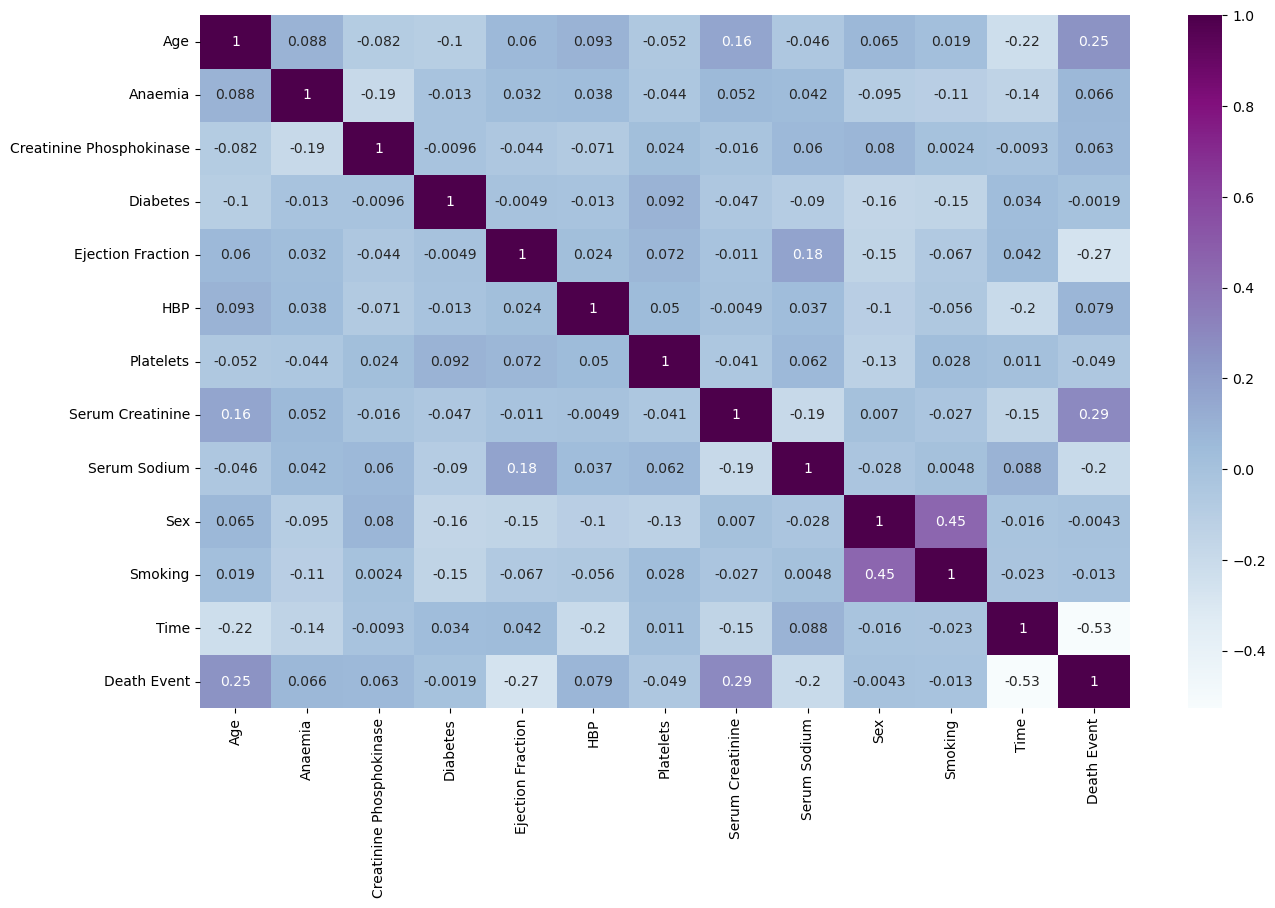

In [11]:
plt.figure(figsize=(15,9))
sns.heatmap(hf.corr(),annot=True,cmap="BuPu");

## Preprocessing

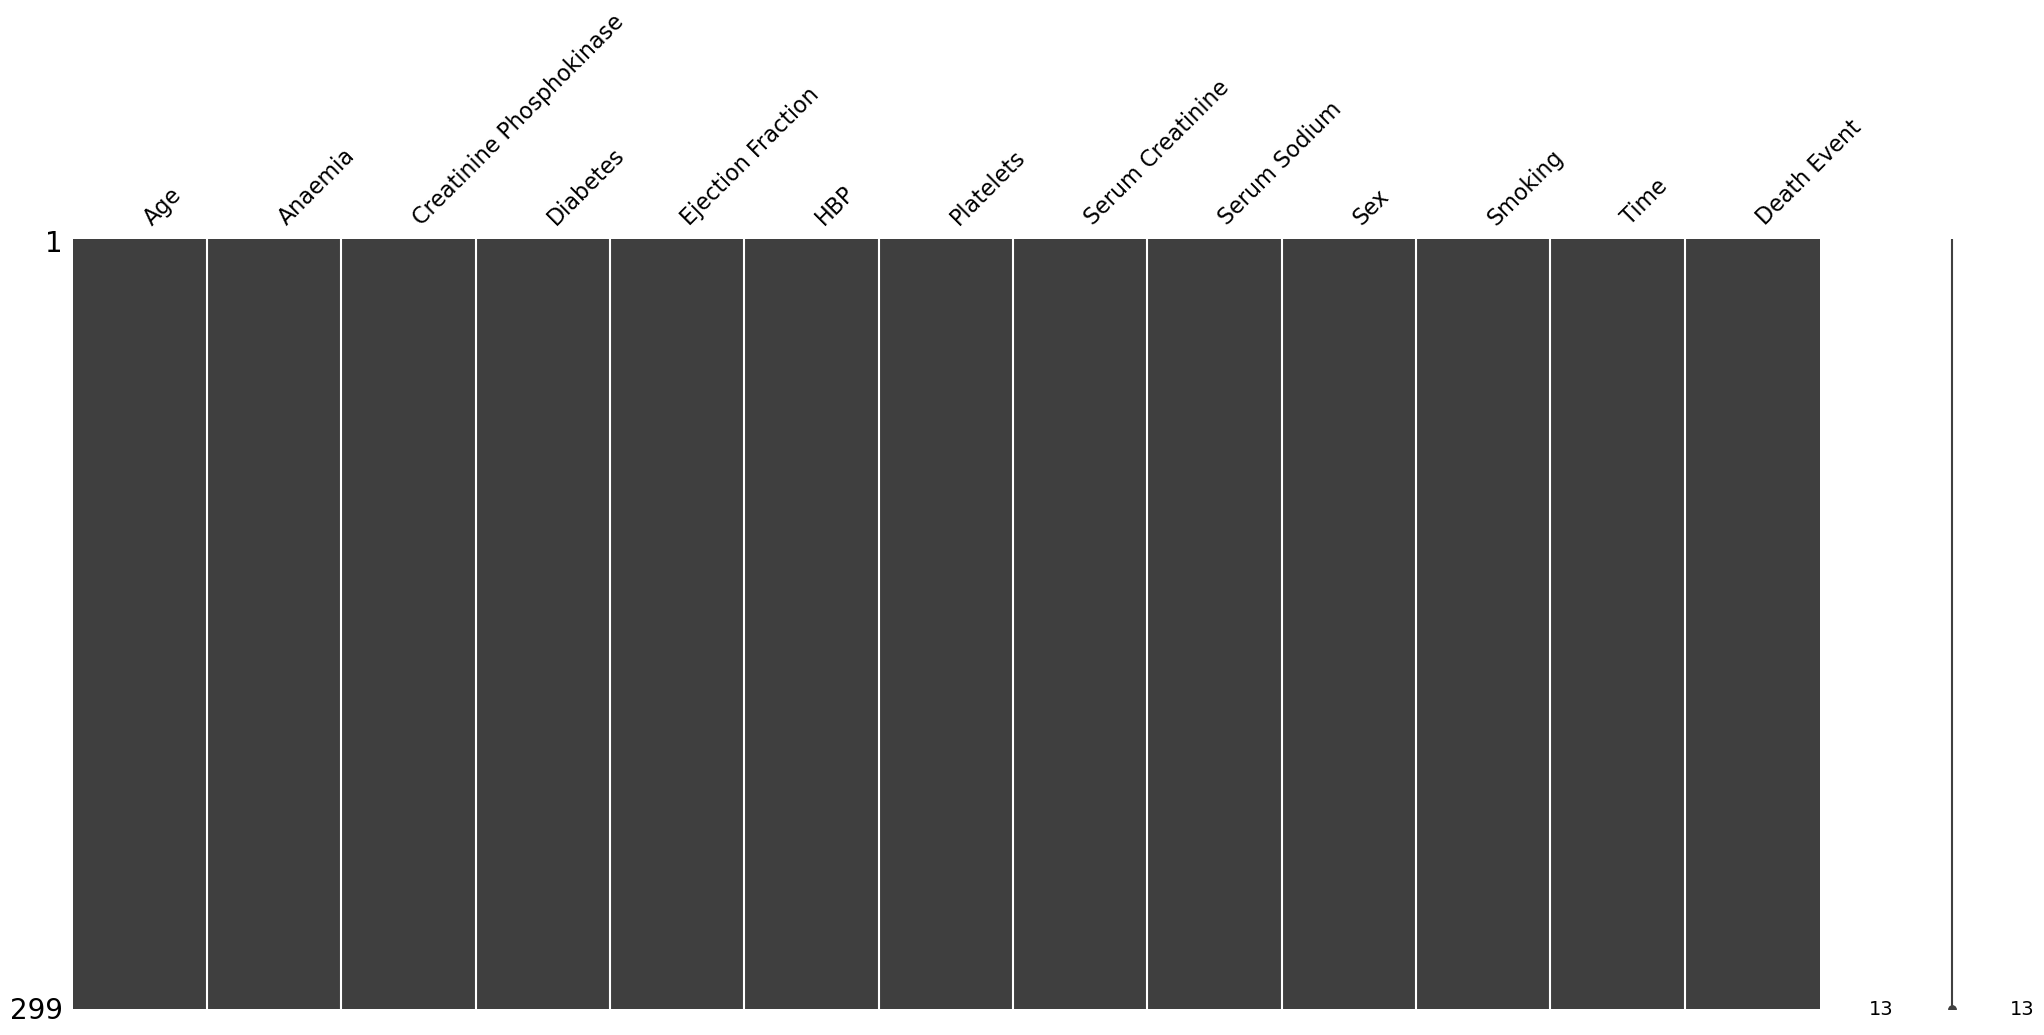

In [12]:
# Missing Values
msn.matrix(hf);

In [13]:
# Duplications
hf.duplicated().sum()

0

### Outlier Check

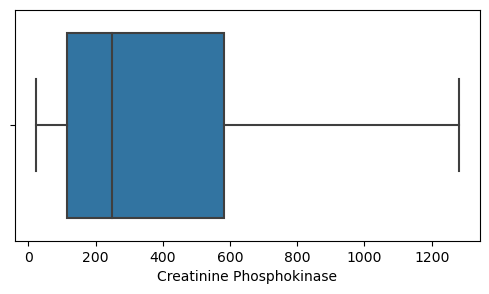

In [231]:
plt.figure(figsize=(6,3))
sns.boxplot(x="Creatinine Phosphokinase",data=hf);

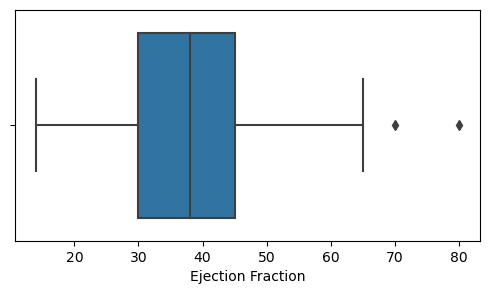

In [15]:
plt.figure(figsize=(6,3))
sns.boxplot(x="Ejection Fraction",data=hf);

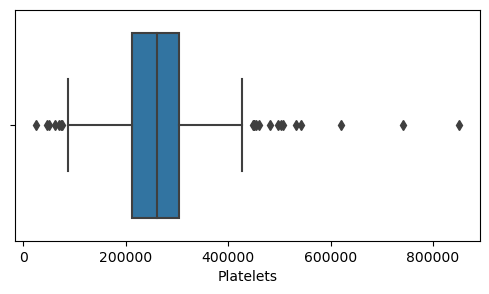

In [16]:
plt.figure(figsize=(6,3))
sns.boxplot(x="Platelets",data=hf);

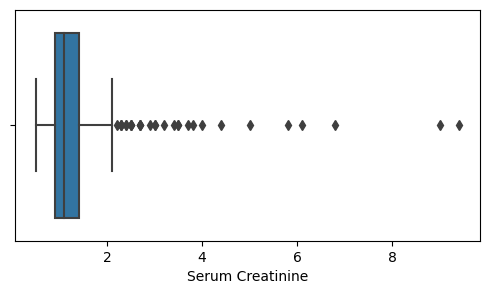

In [17]:
plt.figure(figsize=(6,3))
sns.boxplot(x="Serum Creatinine",data=hf);

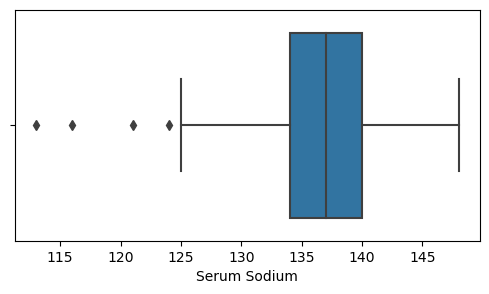

In [18]:
plt.figure(figsize=(6,3))
sns.boxplot(x="Serum Sodium",data=hf);

> *Creatinine Phosphokinase, Ejection Fraction, Serum Creatine and Serum Sodium* contains Outliers

### Removing Outliers

In [19]:
def fences(hf, col):
    Q3 = hf[col].quantile(0.75)
    Q1 = hf[col].quantile(0.25)
    IQR = Q3 - Q1
    UF = Q3 + 1.5*IQR
    LF = Q1 - 1.5*IQR
    return UF, LF

In [20]:
for col in ['Creatinine Phosphokinase','Ejection Fraction','Platelets','Serum Creatinine','Serum Sodium']:
    UF, LF = fences(hf, col)
    hf[col] = np.where((hf[col] > UF), UF, hf[col])
    hf[col] = np.where((hf[col] < LF), LF, hf[col])

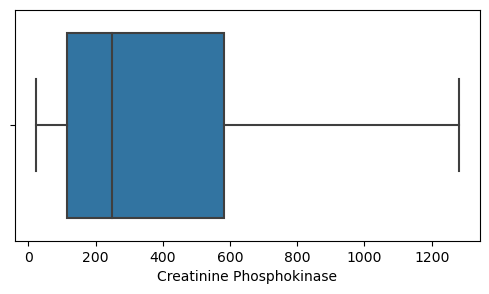

In [234]:
# Checking for outliers after removal
plt.figure(figsize=(6,3))
sns.boxplot(x="Creatinine Phosphokinase",data=hf);

## *Visualizations*

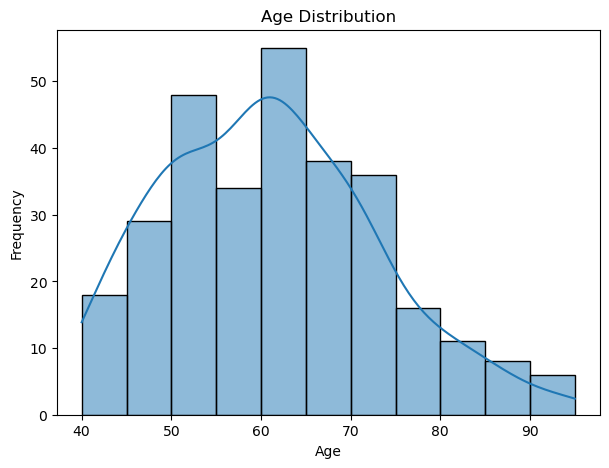

In [238]:
plt.figure(figsize=(7,5))
sns.histplot(x="Age",data=hf,kde=True,binwidth=5)
plt.xlabel("Age")
plt.title("Age Distribution")
plt.ylabel("Frequency");

The Top three age range of the patients are:

60 - 65, 50 - 55, 65-70

In [86]:
def count(col_name):
    sns.countplot(x=hf[col_name])
    title = "{}".format(col_name)
    plt.title(title)

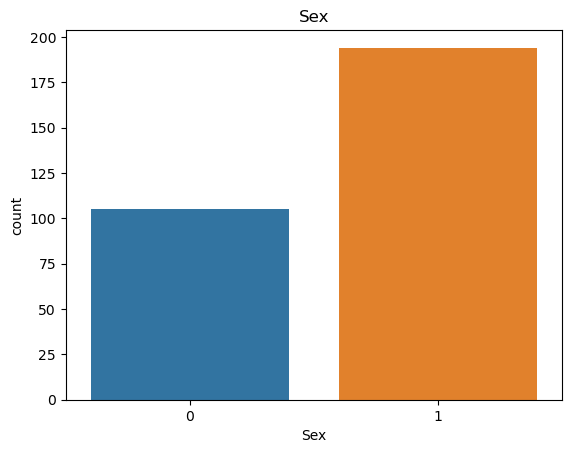

In [87]:
count("Sex")

*194 Males and 105 Females*

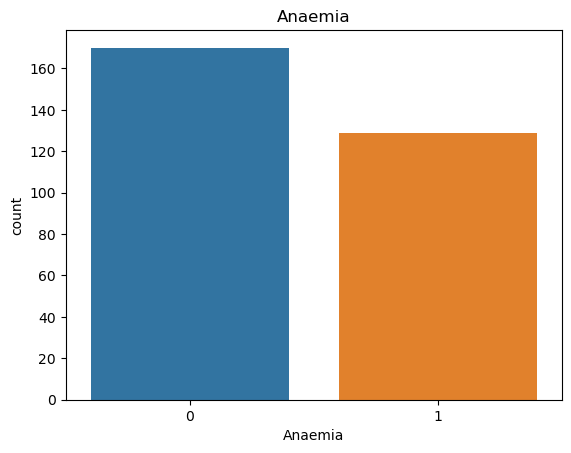

In [66]:
count("Anaemia")

*Out of the 299 records around 125 were Anaemic*

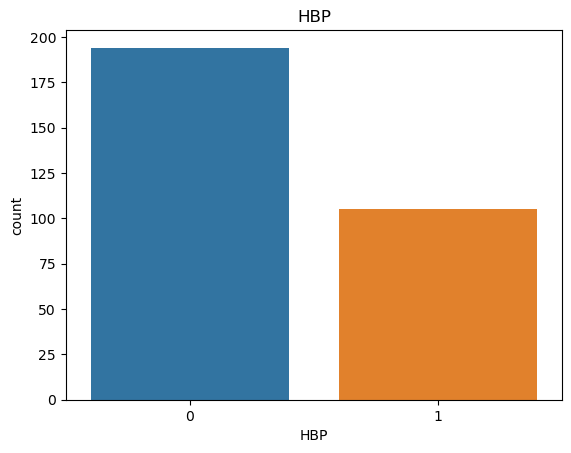

In [67]:
count("HBP")

*It is evident that around 105 out of 299 were diagnosed with hypertension*

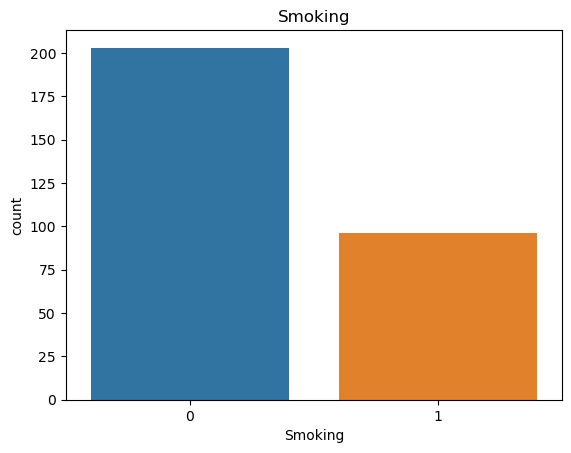

In [68]:
count("Smoking")

*Around 99 of the patients are Smokers*

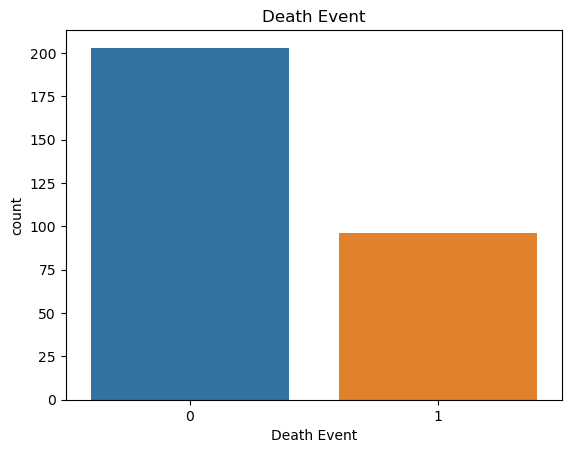

In [69]:
count("Death Event")

# Modeling

In [95]:
x = hf.drop(columns="Death Event") #input dataset
y = hf["Death Event"] #output dataset
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=1)

In [241]:
# Feature Scaling using Standard Scaler()
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Logistic Regression

Accuracy:  0.9166666666666666
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.80      0.86      0.83        14

    accuracy                           0.92        60
   macro avg       0.88      0.90      0.89        60
weighted avg       0.92      0.92      0.92        60



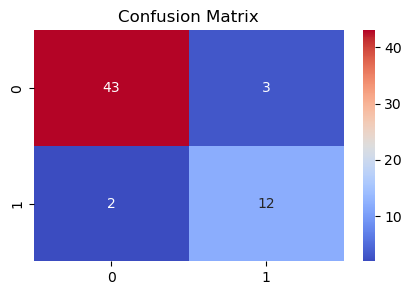

In [243]:
lg = LogisticRegression(random_state=1)
lg.fit(x_train, y_train)

y_pred = lg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))


cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="coolwarm");

### Decision Tree

Accuracy:  0.9166666666666666
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        46
           1       0.85      0.79      0.81        14

    accuracy                           0.92        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.92      0.92      0.92        60



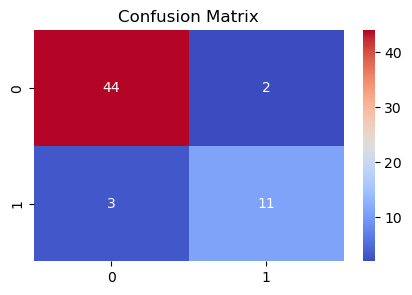

In [216]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))

cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="coolwarm");

### Random Forest

Accuracy:  0.9166666666666666
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.91      0.71      0.80        14

    accuracy                           0.92        60
   macro avg       0.91      0.85      0.87        60
weighted avg       0.92      0.92      0.91        60



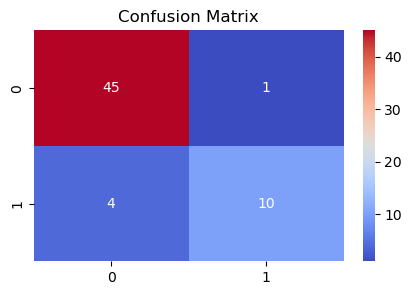

In [217]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))

cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="coolwarm");

### Naive Bayesian

Accuracy:  0.9
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        46
           1       0.72      0.93      0.81        14

    accuracy                           0.90        60
   macro avg       0.85      0.91      0.87        60
weighted avg       0.92      0.90      0.90        60



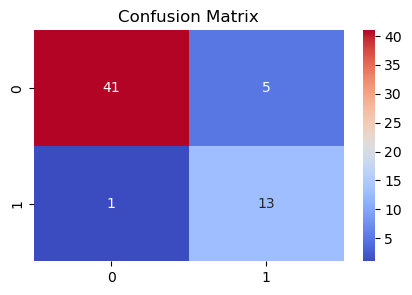

In [218]:
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))

cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="coolwarm");

## Support Vector Machine

Accuracy:  0.8666666666666667
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        46
           1       0.71      0.71      0.71        14

    accuracy                           0.87        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.87      0.87      0.87        60



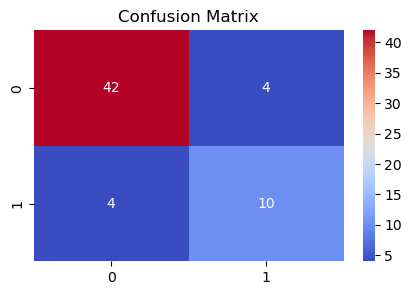

In [219]:
svm = SVC(kernel = 'rbf', random_state=1)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))

cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="coolwarm");